In [2]:
import numpy as np
from numpy import *
from numpy import nan
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
# %pylab
# pd.set_option('display.mpl_style', 'default')
# import scipy.integrate
plt.style.use(astropy_mpl_style)

In [75]:
#Need to get rid of 0 points (non readings) and bad readings
def FancyPlot(xlab='',ylab='',lw=2.5,lfs=45,tfs=25,size_x=13,size_y=12):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    mpl.rcParams['mathtext.default'] = 'regular'
    fig = plt.figure(figsize=(size_x,size_y))
    ax=fig.add_subplot(111)
    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)
    ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax.grid(False)
    return fig,ax
def HexPlot(xlab1='',ylab1='',xlab2='',ylab2='',xlab3='',ylab3='',\
           wspace=0.25,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=7,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig,axarr =plt.subplots(1,3,figsize=(size_x,size_y))
    gs=gridspec.GridSpec(1,3)
    gs.update(wspace=wspace)
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    ax3=plt.subplot(gs[2])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax3.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax3.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    ax3.set_xlabel(xlab3,fontsize=lfs)
    ax3.set_ylabel(ylab3,fontsize=lfs)
    
    ax1.grid(False)
    ax2.grid(False)
    ax3.grid(False)
    return fig,ax1,ax2,ax3
def StackedPlot(xlab1='',ylab1='',xlab2='',ylab2='',\
                hspace=0.01,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=11,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    
    fig,axarr =plt.subplots(2,1,figsize=(size_x,size_y),sharex=True,sharey=True)
    gs=gridspec.GridSpec(2,1,height_ratios=(9, 1))
    gs.update(hspace=hspace)
    
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=0)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax1.set_xticklabels([],c='w')
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=0)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax2.set_xticks([3,4,5,6,7,8])
    ax2.set_yticks([-1,0,1])
#     ax2.
#     ax2.set_xlim
    
#     ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    if Grid:
        axs[0].grid()
        axs[1].grid()
    ax1.grid(False)
    return fig,ax1,ax2

In [76]:
# path = os.path.expanduser('~/Documents/FINALM/')

# Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 

# path2 = os.path.expanduser('~/Documents/')
# comp_ew=Table.read(os.path.expanduser(path2+'comp_ew.dat'),format='ascii')
# xy = comp_ew.to_pandas()
# xyz = xy[xy['col1']<100000]
# stuff = xyz.drop(['col3','col4'],axis=1)
# stuff.rename(columns={'col1':'id' ,'col2':'redshift'} ,inplace=True)
# # Montague
# # chestnut1=[]
# # sunshine1=[]
# # rainbow1=[]
# Montague2 = Montague.where(Montague['id'].isin(stuff['id'])).dropna()
# Montague2['id'].iloc[0]

/tmp/ipykernel_3661877/1266330118.py:116: RuntimeWarning: divide by zero encountered in log10
  Unatten_log=log10(E)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_3661877/4268888294.py:56: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, i

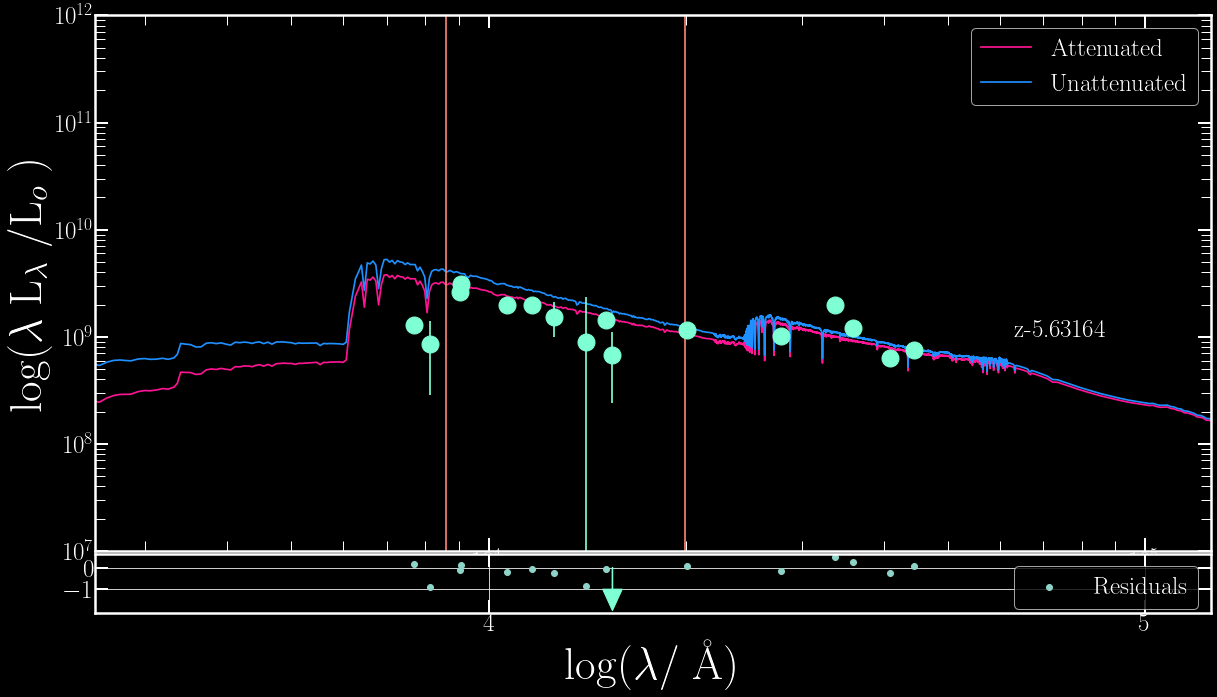

In [199]:
# %%capture
path = os.path.expanduser('~/Documents/JSN/')

Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 

path2 = os.path.expanduser('~/Documents/')
comp_ew=Table.read(os.path.expanduser(path2+'comp_ew.dat'),format='ascii')
xy = comp_ew.to_pandas()
xyz = xy[xy['col1']<100000]
stuff = xyz.drop(['col3','col4'],axis=1)
stuff.rename(columns={'col1':'id' ,'col2':'redshift'} ,inplace=True)

chestnut1=[]
sunshine1=[]
rainbow1=[]
# Montague2 = Montague.where(Montague['id'].isin(stuff['id'])).dropna()
for Treesa in range(1):
#     potato=str(int(Montague2['id'].iloc[19]))
#     potato=str(Montague['id'][Treesa])
    potato=str(99441)#11999
    galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+potato+'.sed'),index_col=None, header=None,on_bad_lines='skip', skiprows=10,delim_whitespace=True)
    galaxy_sed.columns = ['A', 'B', 'C']
    A=galaxy_sed['A']
    B=galaxy_sed['B']
    C=galaxy_sed['C']
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    galaxy_fit2 = pd.DataFrame(columns=['Full'])
    Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    lambda_c =Filters['$\lambda_c$']
    galaxy_fit3 = pd.DataFrame(columns=[])
    galaxy_fit_s = galaxy_fit.drop(galaxy_fit.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]])

    chi2 = float(galaxy_fit.index[6].split()[2])
    chestnut1.append(chi2)
    Stellar_mass = float(galaxy_fit.index[8].split()[5])
    sunshine1.append(Stellar_mass)
    StarForm = float(galaxy_fit.index[8].split()[15])
    rainbow1.append(StarForm)
    
    #SED FILE is in L_lambda/LoA^-1. A is log of the wavelength in angstroms
    
    redshift =float(galaxy_fit.index[6].split()[-1])
    light=2.998*(10**18) #speed of light in Angstroms ~ A/s
    lambda_cA = lambda_c*10000 #central wavelength in Angstroms
    x=cosmo.luminosity_distance(redshift)
    meters=x*3.0857*10**22 #Mpc to m
    dist = meters.value
    B = np.array(B)
    A = np.array(A)
    L_lambda = 10**B #L_0/Angstroms
    lambd = 10**A #Angstroms
    L_nu=L_lambda*lambd**2/light #L_0
    f_nu = (L_nu*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
#     f_nu = (L_nu*(3.826*10**26))/(4*pi*dist**2)
    f_nu = f_nu/10**-26
    # print(f_nu)

    C = np.array(C)
    L_lambda2=10**C
    L_nu2=L_lambda2*lambd**2/light
    f_nu2 =(L_nu2*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
    f_nu2 = f_nu2/10**-26

    f_lambda = light*f_nu/lambd**2
    f_lambda2 = light*f_nu2/lambd**2
    
    
  
    ###################################################
    for i in range(len(galaxy_fit)):
        line = galaxy_fit.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=23: #14 23
            continue
        str_line = " ".join(str(item) for item in line)
        galaxy_fit2.loc[i]=str(str_line)


    names = []
    for i in range(len(Filters['Name'])):
          names.append(Filters.iloc[i,0])
    names
    galaxy_fit2[names] = galaxy_fit2['Full'].str.split(" ",expand=True,)
    galaxy_fit2=galaxy_fit2.drop(['Full'],axis=1)


    test=Table.from_pandas(galaxy_fit2)
    L_nu=[float(s) for s in test[0]] #First row.
    L_nu_err=[float(s) for s in test[1]] #Second row
    L_nu=np.array(L_nu) #Luminosity per unit Hz - L_o/s^-1 = L_o*s This is a flux unit but it's not Janskys. 
    L_nu_err=np.array(L_nu_err)

    L_nu_err=L_nu_err#*(1+redshift)
    lL_lambda_err=L_nu_err*light/lambda_cA


    L_lambda=L_nu*light/(lambda_cA)**2 #L_o*s * A/s /A^2 = L_o/A
    lL_lambda=L_lambda*lambda_cA #A *L_o/A =L_o

    arr = np.array(A) #log(A) from SED file
    arr2 = 10**(arr) #Angstroms (A)
    wavelengths = arr2.tolist() #A
    Qlog=log10(wavelengths) #log(A)
    Atten = np.array(B) #log(L_o/A)
    D = (10**Atten)*wavelengths #L_o/A *A = L_o

    D=D.tolist()
    # D = (10**Atten)*Q #L_o/A *A = L_o     #*10000) #Luminosity per unit lambda
    Unatten = np.array(C)
    E = (10**Unatten)*wavelengths  


    E=E.tolist()     #*10000) #^
    Atten_log=log10(D) #log(L_o)
    Unatten_log=log10(E)
    z=log10(lL_lambda) #log(L_o)
    t=log10(lambda_cA) #log(A)


    L_obs =[float(s) for s in test[2]]#Third Row
    L_obs =np.array(L_obs)
    Res = (L_nu - L_obs)/L_nu
    for i in range(len(Res)):
#         if log10(-Res[i])>5:
#             Res[i]=nan
        if L_nu[i] <0:
            Res[i]=nan
    plt.style.use('dark_background')
    fig,ax1,ax2=StackedPlot('',r'log($\lambda$ L$_\lambda$ /L$_o$ )',r'log($\lambda$/ \AA)','')
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.set_ylim(bottom=10**7, top=10**12)
    ax1.set_xlim(left=10**3.4,right=10**5.1)
#     ax1.rcParams['font.size'] = '18'
    ax1.plot(10**Qlog,10**Atten_log/(1+redshift),label='Attenuated',c='deeppink')
    ax1.plot(10**Qlog,10**Unatten_log/(1+redshift),label='Unattenuated',c='dodgerblue')
    ax1.legend()
#     ax1.scatter(t,z)#,label='*$\lambda$')
    ax1.errorbar(10**t,10**z,yerr=lL_lambda_err,fmt='o',c='aquamarine',ms=17)
    ax1.errorbar(10**t.iloc[33:36],10**z.iloc[33:36], yerr=lL_lambda_err.iloc[33:36],fmt='o',markerfacecolor='red',markeredgecolor='k',ms=17)
    ax1.axvline(x=(redshift*3000+3000),c='salmon')
    ax1.axvline(x=(redshift*1300+1300),c='salmon')
#     axs[1] = plt.axes([0,0,1,1])

    ax1.annotate('z-'+str(redshift),xy=(10**4.8,10**9),size=25)
    ax2.set_xlim(left=3.4,right=5.1)
    
    for i in range(len(Res)):
        if Res[i]>1:
            ax2.arrow(t[i],0,0,1,head_width=0.03, head_length=1, fc='aquamarine', ec='aquamarine')
        if Res[i]<-1:
            ax2.arrow(t[i],0,0,-1,head_width=0.03, head_length=1, fc='aquamarine', ec='aquamarine')
    for i in range(len(Res)):
        if abs(Res[i])>1:
            Res[i]=nan
    ax2.scatter(t,Res,label='Residuals')
    ax2.legend()
    plt.savefig('JSN-'+potato+'Luminosity'+'M2.png',format='png', dpi=600, bbox_inches='tight')
###########################################################    



In [182]:
path = os.path.expanduser('~/Documents/Lower/')

Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat'))
light=2.998*(10**18) #speed of light in Angstroms ~ A/s
for i in range(len(Montague)):
    potato=str(Montague['id'][i])
#     print(i)
#     potato=str(22839)
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    redshift =float(galaxy_fit.index[6].split()[-1])
    galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+potato+'.sed'),index_col=None, header=None,on_bad_lines='skip', skiprows=10,delim_whitespace=True)
    galaxy_sed.columns = ['A', 'B', 'C']
    Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    lambda_c =Filters['$\lambda_c$']
    lambda_cA = lambda_c*10000
    
    A=galaxy_sed['A']
    B=galaxy_sed['B']
    C=galaxy_sed['C']
    B = np.array(B)
    A = np.array(A) 
    C = np.array(C)
    L_lambda = 10**B
    L_lambda = L_lambda*3.846*10**33 #  Luminosity in wavelength space (erg/s/A)
    L_lambdaU = 10**C #erg/s/Angstroms
    L_lambdaU = L_lambdaU*3.846*10**33
    lambd = 10**A #Angstroms
    lambd = lambd/(1+redshift) #rest frame wavelength in Angstroms
    L_nu1 = L_lambda*lambd**2/light # Luminosity in frequency space (erg/s/Hz)
    L_nu2 = L_lambdaU*lambd**2/light
    nu = light/lambd #rest frame frequency in Hertz
    dfdf = pd.concat([pd.Series(lambd).rename('lambd'),pd.Series(L_lambda).rename('L_lambdaA'),
                  pd.Series(L_lambdaU).rename('L_lambdaU'),pd.Series(nu).rename('nu'),pd.Series(L_nu1).rename('L_nuA'),
                  pd.Series(L_nu2).rename('L_nuU')], axis=1)
#     print(redshift)
#     Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    
    galaxy_fit2 = pd.DataFrame(columns=['Full'])
    for i in range(len(galaxy_fit)):
        line = galaxy_fit.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=23: #40,23,14
            continue
        str_line = " ".join(str(item) for item in line)
        galaxy_fit2.loc[i]=str(str_line)


    names = []
    for i in range(len(Filters['Name'])):
          names.append(Filters.iloc[i,0])
#     names
    galaxy_fit2[names] = galaxy_fit2['Full'].str.split(" ",expand=True,)
    galaxy_fit2=galaxy_fit2.drop(['Full'],axis=1)
    
    test=Table.from_pandas(galaxy_fit2)
    L_nu40_er=[float(s) for s in test[1]] #1 for error 0 for flux
    L_nu40_er=np.array(L_nu40_er)
    L_lambda40_er=L_nu40_er*light/(lambda_cA)**2
    file_path = f"{'~/Documents/LowerB'}/"+str(potato)+"photom_Ll_er.csv"
    pd.Series(L_lambda40_er).rename('L_lambda40_er').to_csv(file_path,index=False)
    L_nu40=[float(s) for s in test[0]] #1 for error 0 for flux
    L_nu40=np.array(L_nu40)
    L_lambda40=L_nu40*light/(lambda_cA)**2
    file_path = f"{'~/Documents/LowerB'}/"+str(potato)+"photom_Ll.csv"
    pd.Series(L_lambda40).rename('L_lambda40').to_csv(file_path,index=False)
    file_path = f"{'~/Documents/LowerB'}/"+str(potato)+"-RF-lum-Lower"
    dfdf.to_csv(file_path)
print('done')

    
    

done


In [54]:
from scipy import stats
from scipy.stats import linregress
def linear_slope_cutoff(x,y,lower,upper):
    mask = (x >= lower)&(x <=upper)
    x_cutoff = x[mask]
    y_cutoff = y[mask]
    slope, intercept,r_value, p_value, std_err = stats.linregress(log10(x_cutoff), log10(y_cutoff))
#     x_fit = np.linspace(lower,upper,1000)
#     y_fit = slope*x_fit + intercept
    return slope,intercept, std_err

from scipy.optimize import curve_fit

def linear_func(x,a,b):
    return a*x+b
def slope_curve_fit(x,y,y_err,lower,upper):
    mask = (x >= lower)&(x <=upper)
    x_cutoff = x[mask]
    y_cutoff = y[mask]
    y_cutoff_err = y_err[mask]
#     print(y_cutoff_err)
    slope = np.nan
    slope_err = np.nan
    intercept = np.nan
    for i in y_cutoff.index:
        if y_cutoff[i] < 0:
            y_cutoff[i] = nan
            y_cutoff_err[i] = nan
#     for i in y_cutoff.index:
#         if y_cutoff[]
    valid_indices = np.sum(~np.isnan(y_cutoff))

    if valid_indices >= 3:
        mask3 = ~np.isnan(y_cutoff)
        x_cutoff = x_cutoff[mask3]
        y_cutoff = y_cutoff[mask3]
        y_cutoff_err = y_cutoff_err[mask3]
        mask2 = np.logical_not(np.isnan(y_cutoff))
        x_cutoff=x_cutoff[mask2]
        y_cutoff=y_cutoff[mask2]
        y_cutoff_err=y_cutoff_err[mask2]

    #     sigma = y_cutoff_err/np.sqrt(len(x_cutoff))
        mango = log10(y_cutoff_err+y_cutoff)
        peach = log10(y_cutoff)
        sigma= (mango-peach)
    #     print(sigma)

        popt,pcov, = curve_fit(linear_func,log10(x_cutoff), log10(y_cutoff), sigma=sigma, absolute_sigma=True)

        slope = popt[0]
        intercept = popt[1]
        slope_err = np.sqrt(pcov[0][0])
#     x_fit = np.linspace(lower,upper,1000)
#     y_fit = slope*x_fit + intercept
    return slope,slope_err, intercept#, x_fit, y_fit
#scipy curvefit

In [191]:
path = os.path.expanduser('~/Documents/C7/')
Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 
beta=[]
beta_er=[]
betaU=[]
betaU_er=[]
betaP=[]
betaP_er=[]
# sion=[]
bouwen=[]
bouwenA=[]

for i in range(len(Montague)):
    potato=str(Montague['id'][i])
#     print(potato)
#     potato=str(6020)#10017 #7071   
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    lambda_c =Filters['$\lambda_c$']
    lambda_cA = lambda_c*10000
    L = pd.read_csv(os.path.expanduser('~/Documents/C7B/'+potato+'photom_Ll.csv'))
    L_lambda40=L['L_lambda40']
    Lx = pd.read_csv(os.path.expanduser('~/Documents/C7B/'+potato+'photom_Ll_er.csv'))
    L_lambda40_er=Lx['L_lambda40_er']
#     L2 = pd.read_csv(os.path.expanduser('~/Documents/FMIGM-BluminosityParams/'+potato+'-RF-lum-FMIGM'))
    L2 = pd.read_csv(os.path.expanduser('~/Documents/C7B/'+potato+'-RF-lum-C7'))
    lambd=L2['lambd']
    L_lambda=L2['L_lambdaA']
    L_lambdaU=L2['L_lambdaU']
    redshift =float(galaxy_fit.index[6].split()[-1])
#     print(i)
    lower = 1300
    upper = 3000
    slope,intercept, std_err = linear_slope_cutoff(lambd,L_lambda,lower,upper)
    slopeU,interceptU, stdU_err = linear_slope_cutoff(lambd,L_lambdaU,lower,upper)
#     slopeP,interceptP, stdP_err = linear_slope_cutoff2(lambda_cA/(1+redshift),L_lambda40,lower,upper)
    slopeP,slopeP_err, interceptP = slope_curve_fit(lambda_cA/(1+redshift),L_lambda40,L_lambda40_er,lower,upper)
    
    beta.append(slope)
    beta_er.append(std_err)
    betaU.append(slopeU)
    betaU_er.append(stdU_err)
    betaP.append(slopeP)
    betaP_er.append(slopeP_err)

    
    if slopeU > -2:
        sioncalc = 25.13-0.6*(slopeU+2)
    else:
        sioncalc = 25.13-1.1*(slopeU+2)
        
    if slope > -2:
        sionAcalc = 25.13-0.6*(slope+2)
    else:
        sionAcalc = 25.13-1.1*(slope+2)
#     sion.append(logresult)
    bouwen.append(sioncalc)
    bouwenA.append(sionAcalc)
print('done')
# print(beta,beta_er,betaU,betaU_er,betaP,betaP_er)
# bouwenA=[]

done


In [192]:
df1=pd.concat([Montague['id'],pd.Series(beta).rename('beta'),pd.Series(beta_er).rename('beta_er'),
               pd.Series(betaU).rename('betaU'),pd.Series(betaU_er).rename('betaU_er'),
              pd.Series(betaP).rename('betaP'),pd.Series(betaP_er).rename('betaP_er'),
              pd.Series(bouwen).rename('bouwen'),pd.Series(bouwenA).rename('bouwenA')],axis=1)
df1


,id,beta,beta_er,betaU,betaU_er,betaP,betaP_er,bouwen,bouwenA
0,1,0.473443,0.020752,-2.443968,0.017635,NaN,NaN,25.618365,23.645934
1,2,-2.590782,0.009192,-2.672960,0.009043,-2.843718,0.230310,25.870256,25.779860
2,3,-2.295955,0.008532,-2.565269,0.007852,-3.032129,0.520706,25.751796,25.455550
3,4,-2.186229,0.008479,-2.738544,0.007685,-1.923140,0.166102,25.942399,25.334852
4,5,-2.497333,0.008610,-2.758360,0.007633,-4.153593,0.092237,25.964196,25.677066
...,...,...,...,...,...,...,...,...,...
662,663,-2.459058,0.006221,-2.644667,0.005778,-2.563172,0.338013,25.839134,25.634963
663,664,-1.766325,0.024899,-2.300490,0.024074,-0.532678,0.228652,25.460539,24.989795
664,665,-2.549520,0.009677,-2.586470,0.009640,-2.858465,0.191597,25.775117,25.734472
665,666,-1.210198,0.038437,-2.335078,0.023255,-0.764207,0.194724,25.498586,24.656119


In [58]:
c=2.998e8
h= 6.626*10**-27#erg*s (1 J = 10**7 ergs, h is traditionally in units of J*s)
#solar luminosity ~ 3.828 *10**33 erg/s #3.846 *10**33
def integral_above_cutoff(L_nu, nu, const):
    cutoff_freq = c / (91.2e-9)
    mask = nu>cutoff_freq
    nu_above_cutoff = nu[mask]
    L_nu_above_cutoff = L_nu[mask]
    dnu = np.diff(nu_above_cutoff)
#     integrand_above_cutoff = integrand(nu_above_cutoff,L_nu_above_cutoff)
    integrand_above_cutoff = L_nu_above_cutoff[1:]/(h*nu_above_cutoff[1:])
#     print(L_nu_above_cutoff[1:])
    integral = np.sum(dnu*integrand_above_cutoff)
#     integral = np.trapz(integrand_above_cutoff, nu_above_cutoff)
    return -integral/(const)#const was x3.846*10**33

In [193]:
path = os.path.expanduser('~/Documents/C7/')

Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 
sionx=[]
for i in range(len(Montague)):
    potato=str(Montague['id'][i])
#     potato=str(17189)
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    redshift =float(galaxy_fit.index[6].split()[-1])
#     df = pd.read_csv(os.path.expanduser('~/Documents/FMIGM-BluminosityParams/'+potato+'-RF-lum-FMIGM'),index_col=0,on_bad_lines='skip')
    df=pd.read_csv(os.path.expanduser('~/Documents/C7B/'+potato+'-RF-lum-C7'),index_col=0,on_bad_lines='skip')
    pos = (df['L_nuU'] - df['L_nuU'].iloc[(df['nu']-c/1500e-10).abs().argsort()[0]]).abs().argsort()[0]
    const = df['L_nuU'][pos]
#     df
    result=integral_above_cutoff(df['L_nuU'], df['nu'], const) #nu is in Hz df['L_nuU']*3.846*10**33
    logresult=log10(result)
    sionx.append(logresult)

In [194]:
df2 = pd.concat([df1,pd.Series(sionx).rename('sion')],axis=1)
df2.to_csv('Bluminosity-C7.csv',index=False)
df2
# max(sion)
# max(sionx)25.153568,25.107298

,id,beta,beta_er,betaU,betaU_er,betaP,betaP_er,bouwen,bouwenA,sion
0,1,0.473443,0.020752,-2.443968,0.017635,NaN,NaN,25.618365,23.645934,25.147310
1,2,-2.590782,0.009192,-2.672960,0.009043,-2.843718,0.230310,25.870256,25.779860,25.245917
2,3,-2.295955,0.008532,-2.565269,0.007852,-3.032129,0.520706,25.751796,25.455550,25.181412
3,4,-2.186229,0.008479,-2.738544,0.007685,-1.923140,0.166102,25.942399,25.334852,25.270128
4,5,-2.497333,0.008610,-2.758360,0.007633,-4.153593,0.092237,25.964196,25.677066,25.280101
...,...,...,...,...,...,...,...,...,...,...
662,663,-2.459058,0.006221,-2.644667,0.005778,-2.563172,0.338013,25.839134,25.634963,25.214522
663,664,-1.766325,0.024899,-2.300490,0.024074,-0.532678,0.228652,25.460539,24.989795,25.067724
664,665,-2.549520,0.009677,-2.586470,0.009640,-2.858465,0.191597,25.775117,25.734472,25.202496
665,666,-1.210198,0.038437,-2.335078,0.023255,-0.764207,0.194724,25.498586,24.656119,25.086778


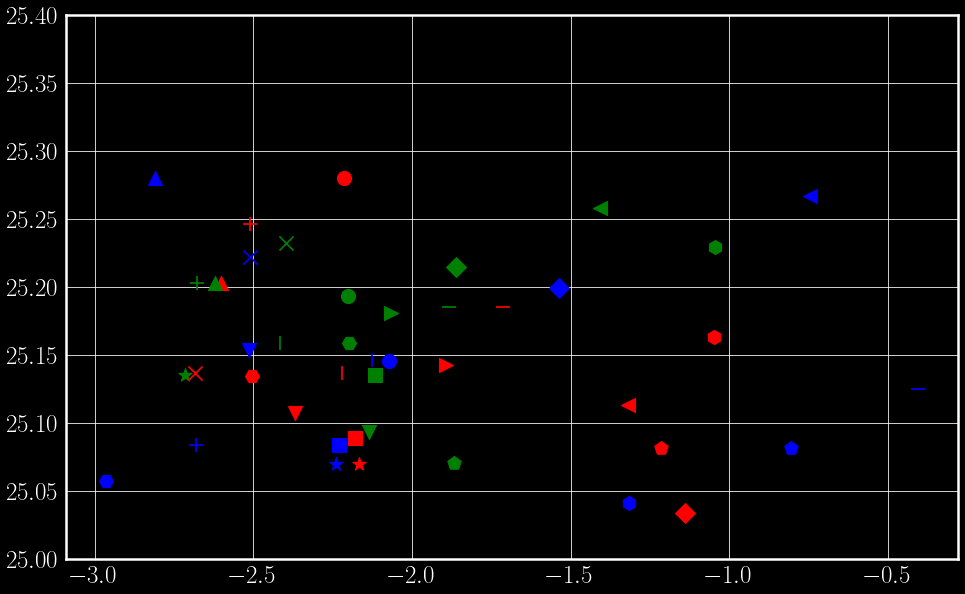

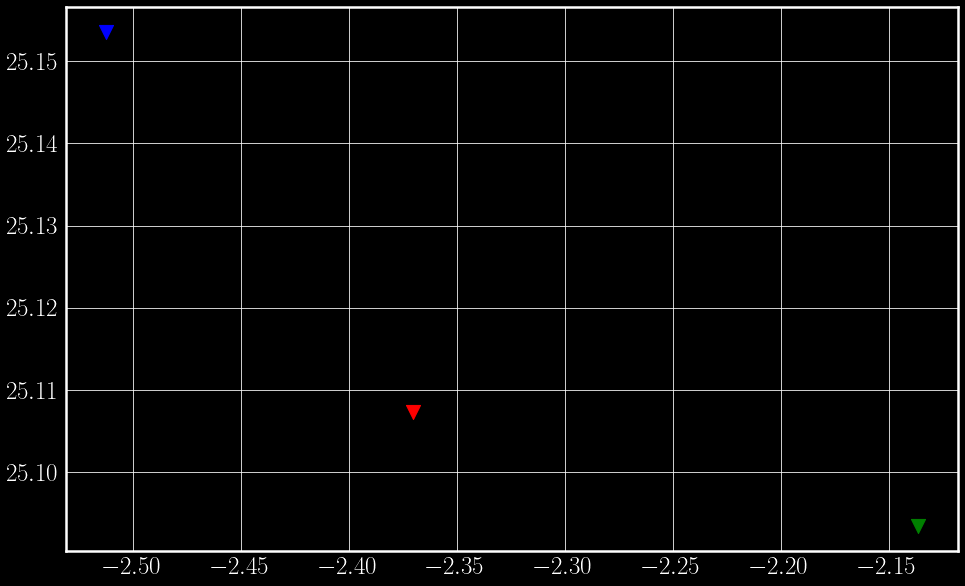

In [190]:
Upper=pd.read_csv(os.path.expanduser('~/notebook/Laptop/Bluminosity-Upper.csv'))
Middle =pd.read_csv(os.path.expanduser('~/notebook/Laptop/Bluminosity-JSN.csv'))
Lower =pd.read_csv(os.path.expanduser('~/notebook/Laptop/Bluminosity-Lower.csv'))
plt.figure(figsize=(16,10))
merged_df = pd.merge(Middle, Upper['id'], on='id', how='inner')
# merged_df2 = pd.merge(Lower, Upper['id'], on='id', how='inner')
colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow',
          'brown', 'pink', 'gray', 'cyan', 'magenta', 'teal',
          'lime', 'indigo', 'gold']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+', 'x', '|',
           '>', '<', 'h', 'H', '_']
for i in range(len(markers)):
    plt.scatter(Upper['betaP'][i],Upper['sion'][i],label='Upper',c='red',marker=markers[i],s=200)
    plt.scatter(merged_df['betaP'][i],merged_df['sion'][i],label='Middle',c='green',marker=markers[i],s=200)
    plt.scatter(Lower['betaP'][i],Lower['sion'][i],label='Lower',c='blue',marker=markers[i],s=200)
# merged_df
plt.ylim(25.0,25.4)

plt.figure(figsize=(16,10))
plt.scatter(Upper['betaP'][3],Upper['sion'][3],label='Upper',c='red',marker=markers[3],s=200)
plt.scatter(merged_df['betaP'][3],merged_df['sion'][3],label='Middle',c='green',marker=markers[3],s=200)
plt.scatter(Lower['betaP'][3],Lower['sion'][3],label='Lower',c='blue',marker=markers[3],s=200)

In [125]:
Upper

,id,beta,beta_er,betaU,betaU_er,betaP,betaP_er,bouwen,bouwenA,sion
0,134569,-2.214624,0.026263,-2.316316,0.026111,-2.138505,0.072068,25.477948,25.366086,25.069609
1,127202,-0.909519,0.024200,-2.314276,0.025701,-1.348407,0.072135,25.475704,24.475711,25.070436
2,110319,-2.289604,0.023509,-2.318613,0.023480,-2.167541,0.059061,25.480474,25.448564,25.072755
3,115551,-2.549520,0.009677,-2.586470,0.009640,-2.536882,0.059066,25.775117,25.734472,25.202495
4,211388,-2.002245,0.013206,-2.503744,0.012255,-2.022388,0.075278,25.684118,25.132470,25.160315
5,135407,-2.590783,0.009192,-2.672961,0.009043,-2.448580,0.072069,25.870257,25.779861,25.245915
6,151741,-2.366106,0.017692,-2.425030,0.017581,-2.276775,0.094901,25.597533,25.532717,25.137020
7,208359,-2.337617,0.005636,-2.493438,0.005641,-2.372173,0.091040,25.672781,25.501378,25.161928
8,200153,-2.110101,0.014439,-2.479774,0.013530,-1.767185,0.091042,25.657751,25.251111,25.153294
9,111484,-2.289604,0.023509,-2.318613,0.023480,-1.059777,0.094929,25.480474,25.448565,25.072752


In [3]:
huh=pd.read_csv(os.path.expanduser('~/Downloads/kmos_em_ln_integrated_w80_2d_gaussian.txt'))
# huh.columns = huh.iloc[0] ### USE f_hb_bs_16,50,84 = 16th, 50th, 84th percentile flux in 10^-18 ergs/s/cm^2 
huh['f_hb_bs_50_int'] = huh['f_hb_bs_50']/(1+huh['zspec'])
huh

,zfourge_id,zspec,zspec_err,f_hb,f_hb_err,f_o3,f_o3_err,o3_sigma,o3_sigma_err,f_hb_bs_50,...,f_o3_sigma_bs_50,f_o3_sigma_bs_16,f_o3_sigma_bs_84,f_w80_bs_50,f_w80_bs_16,f_w80_bs_84,f_vasym_bs_50,f_vasym_bs_16,f_vasym_bs_84,f_hb_bs_50_int
0,10936,3.604,0.000150,4.360000e+00,5.75,114.0,13.00,5.23,0.827,-999.00,...,5.17,4.69,5.72,1.14,0.956,1.46,2.720000e-11,-1.830000e+01,1.830000e+01,-216.985230
1,11999,3.603,0.000096,2.900000e+01,6.92,195.0,14.90,5.07,0.529,28.90,...,5.16,4.71,5.55,1.22,1.100,1.35,2.720000e-11,-2.720000e-11,1.830000e+01,6.278514
2,12533,3.568,0.000067,3.200000e+01,5.66,239.0,11.70,5.71,0.372,32.50,...,5.81,5.62,6.05,1.35,1.290,1.52,-1.840000e+01,-3.680000e+01,-1.840000e+01,7.114711
3,13155,3.064,0.000214,1.760000e-07,13.40,68.4,12.70,4.25,0.740,-999.00,...,4.34,3.82,5.10,1.28,1.080,1.48,4.140000e+01,2.070000e+01,6.210000e+01,-245.816929
4,13203,3.563,0.000184,3.770000e+00,3.54,84.7,9.93,6.32,0.941,3.77,...,6.55,6.03,6.86,1.66,1.210,1.83,7.370000e+01,3.680000e+01,1.110000e+02,0.826211
5,15111,2.987,0.000046,-9.990000e+02,-999.00,92.2,4.13,3.65,0.270,-999.00,...,3.64,3.54,3.74,1.35,1.320,1.37,2.110000e+01,2.110000e+01,2.110000e+01,-250.564334
6,15357,-999.000,-999.000000,-9.990000e+02,-999.00,-999.0,-999.00,-999.00,-999.000,-999.00,...,-999.00,-999.00,-999.00,-999.00,-999.000,-999.00,-9.990000e+02,-9.990000e+02,-9.990000e+02,1.001002
7,15992,3.653,0.000068,3.740000e+01,8.49,272.0,13.60,5.60,0.384,36.90,...,5.57,5.30,5.81,1.29,1.150,1.43,1.810000e+01,4.220000e-15,5.420000e+01,7.930368
8,18742,3.436,0.000046,1.100000e+01,2.57,89.7,4.94,2.73,0.312,10.90,...,2.65,2.38,2.84,1.27,1.000,1.34,-4.000000e-15,-1.890000e+01,2.720000e-11,2.457169
9,19437,3.436,0.000046,-9.990000e+02,-999.00,-999.0,-999.00,-999.00,-999.000,46.90,...,-999.00,-999.00,-999.00,-999.00,-999.000,-999.00,-9.990000e+02,-9.990000e+02,-9.990000e+02,10.572588


In [195]:
hb_sion=[]
c=2.998e8
h= 6.626*10**-27#erg*s (1 J = 10**7 ergs, h is traditionally in units of J*s)
#solar luminosity ~ 3.828 *10**33 erg/s #3.846 *10**33
for i in range(len(huh['zfourge_id'])):
    df = pd.read_csv(os.path.expanduser('~/Documents/ZFOURGEB/'+str(huh['zfourge_id'][i])+'-RF-lum-ZFOURGE'),index_col=0,on_bad_lines='skip')
#     df=pd.read_csv(os.path.expanduser('~/Documents/FMIGM-BluminosityParams/'+str(huh['zfourge_id'][i])+'-RF-lum-FMIGM'),index_col=0,on_bad_lines='skip')
    
    redshift=huh['zspec'][i]
    print('redshift='+str(redshift))
    pos = (df['L_lambdaA'] - df['L_lambdaA'].iloc[(df['nu']-c/1500e-10).abs().argsort()[0]]).abs().argsort()[0]
    L_UV = (df['L_nuU'][pos])#/3.826*10**33 #conversion to ergs/s
#     print(pos)
#     print(df['lambd'][pos])
#     print('L_UV '+str(df['L_nuU'][pos]))
    
    x=cosmo.luminosity_distance(redshift)
    meters=x*3.0857*10**22 #Mpc to m
    cm = meters*100
    dist2 = cm.value
    L_hb=huh['f_hb_bs_50_int'][i]*10**-18*4*pi*dist2**2
#     print('L_hb '+str(L_hb))
#     caseB= 4.86*10**-13
    caseB = 1.36*10**-12/2.89
    spec_sion=log10(L_hb/(L_UV*caseB))
    print(str(huh['zfourge_id'][i])+' sion '+str(spec_sion))
    print('##################')
    hb_sion.append(spec_sion)

# spec_sion

####

####

huh['spec_sion']=hb_sion
huh.to_csv('specsions.csv')

redshift=3.604
10936 sion nan
##################
redshift=3.603
11999 sion 25.02872237617789
##################
redshift=3.568
12533 sion 25.429640666029027
##################
redshift=3.064
13155 sion nan
##################
redshift=3.563
13203 sion 24.133562737386054
##################
redshift=2.987
15111 sion nan
##################
redshift=-999.0
15357 sion nan
##################
redshift=3.653
15992 sion 24.809654472930358
##################
redshift=3.436
18742 sion 24.732757537925195
##################
redshift=3.436
19437 sion 25.49140963148824
##################
redshift=3.431
19843 sion 25.122186251213844
##################
redshift=3.438
21896 sion 24.988151631394327
##################
redshift=3.088
22136 sion 25.065755290145646
##################
redshift=-999.0
22277 sion nan
##################
redshift=3.249
22731 sion 25.41970286403832
##################
redshift=3.514
22839 sion 24.81321129217379
##################


/tmp/ipykernel_3661877/1117227745.py:25: RuntimeWarning: invalid value encountered in log10
  spec_sion=log10(L_hb/(L_UV*caseB))
/tmp/ipykernel_3661877/1117227745.py:25: RuntimeWarning: invalid value encountered in log10
  spec_sion=log10(L_hb/(L_UV*caseB))
/tmp/ipykernel_3661877/1117227745.py:25: RuntimeWarning: invalid value encountered in log10
  spec_sion=log10(L_hb/(L_UV*caseB))
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/astropy/cosmology/flrw/base.py:1076: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(self._inv_efunc_scalar, z1, z2, args=self._inv_efunc_scalar_args)[0]
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/astropy/cosmology/flrw/base.py:1076: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  

In [84]:
huh

,zfourge_id,zspec,zspec_err,f_hb,f_hb_err,f_o3,f_o3_err,o3_sigma,o3_sigma_err,f_hb_bs_50,...,f_o3_sigma_bs_16,f_o3_sigma_bs_84,f_w80_bs_50,f_w80_bs_16,f_w80_bs_84,f_vasym_bs_50,f_vasym_bs_16,f_vasym_bs_84,f_hb_bs_50_int,spec_sion
0,10936,3.604,0.000150,4.360000e+00,5.75,114.0,13.00,5.23,0.827,-999.00,...,4.69,5.72,1.14,0.956,1.46,2.720000e-11,-1.830000e+01,1.830000e+01,-216.985230,NaN
1,11999,3.603,0.000096,2.900000e+01,6.92,195.0,14.90,5.07,0.529,28.90,...,4.71,5.55,1.22,1.100,1.35,2.720000e-11,-2.720000e-11,1.830000e+01,6.278514,25.014727
2,12533,3.568,0.000067,3.200000e+01,5.66,239.0,11.70,5.71,0.372,32.50,...,5.62,6.05,1.35,1.290,1.52,-1.840000e+01,-3.680000e+01,-1.840000e+01,7.114711,25.415645
3,13155,3.064,0.000214,1.760000e-07,13.40,68.4,12.70,4.25,0.740,-999.00,...,3.82,5.10,1.28,1.080,1.48,4.140000e+01,2.070000e+01,6.210000e+01,-245.816929,NaN
4,13203,3.563,0.000184,3.770000e+00,3.54,84.7,9.93,6.32,0.941,3.77,...,6.03,6.86,1.66,1.210,1.83,7.370000e+01,3.680000e+01,1.110000e+02,0.826211,24.119568
5,15111,2.987,0.000046,-9.990000e+02,-999.00,92.2,4.13,3.65,0.270,-999.00,...,3.54,3.74,1.35,1.320,1.37,2.110000e+01,2.110000e+01,2.110000e+01,-250.564334,NaN
6,15357,-999.000,-999.000000,-9.990000e+02,-999.00,-999.0,-999.00,-999.00,-999.000,-999.00,...,-999.00,-999.00,-999.00,-999.000,-999.00,-9.990000e+02,-9.990000e+02,-9.990000e+02,1.001002,NaN
7,15992,3.653,0.000068,3.740000e+01,8.49,272.0,13.60,5.60,0.384,36.90,...,5.30,5.81,1.29,1.150,1.43,1.810000e+01,4.220000e-15,5.420000e+01,7.930368,24.795659
8,18742,3.436,0.000046,1.100000e+01,2.57,89.7,4.94,2.73,0.312,10.90,...,2.38,2.84,1.27,1.000,1.34,-4.000000e-15,-1.890000e+01,2.720000e-11,2.457169,24.718762
9,19437,3.436,0.000046,-9.990000e+02,-999.00,-999.0,-999.00,-999.00,-999.000,46.90,...,-999.00,-999.00,-999.00,-999.000,-999.00,-9.990000e+02,-9.990000e+02,-9.990000e+02,10.572588,25.477414


In [31]:
df = pd.read_csv(os.path.expanduser('~/Documents/FINAL-BluminosityParams/'+str(huh['zfourge_id'][15])+'-RF-lum-FINAL'),index_col=0,on_bad_lines='skip')
redshift=3.514
pos=np.abs((df['nu'] - c/1500e-10)).idxmin()
L_UV = ((df['L_nuU'][pos])) #conversion to 
print(df['lambd'][pos])
print(pos)
# df['L_lambdaU'][pos]
# L_UV
print(df['L_lambdaU'][pos]*(1500)/3.846*10**33)
print(L_UV)

# redshift=huh['zspec'][0]
x=cosmo.luminosity_distance(3.514)
meters=x*3.0857*10**22 #Mpc to m
cm = meters*100
dist2 = cm.value
L_hb=huh['f_hb_bs_50_int'][15]*10**-18*4*pi*dist2**2

print(L_hb)

# L_UV=(df4['L_nuA'].iloc[182]+df4['L_nuA'].iloc[181])/2

# df4 #22839

print(log10(L_hb/(L_UV*caseB)))
# # print(L_UV)

# redshift=6.753
# x=cosmo.luminosity_distance(huh['zspec'][0])
# meters=x*3.0857*10**22 #Mpc to m
# cm = meters*100
# distM = cm.value
# L_UV_Mat = 4*10**-3*10**-18*1500
# L_UV_Mat

caseB= 4.86*10**-13
print(caseB)
# log10(L_hb/(L_UV*caseB))

1504.999810541546
182
2.2838281643758663e+42
4.424077306711772e-06
4.696700854638256e+41
59.33933392316937
4.86e-13


In [126]:
# main= Table.read('~/Downloads/MW_44fields_main_table_v1.0.fits')
# main

# # load your tables into dataframes
# table1 = main
# table2 = Table.read('~/notebook/Laptop/ra_dec.csv')

# # extract the RA and DEC columns from each table
# ra1, dec1 = table1['RA'], table1['DEC']
# ra2, dec2 = table2['ra'], table2['dec']

# # set a tolerance for matching coordinates (in degrees)
# tolerance = 1/3600

# # initialize an empty list to store matching indices
# match_indices = []

# # loop over each coordinate in table1 and search for matches in table2
# for i in range(len(ra1)):
#     for j in range(len(ra2)):
#         # calculate the angular separation between the two coordinates
#         sep = np.sqrt((ra1[i]-ra2[j])**2 + (dec1[i]-dec2[j])**2)
        
#         # check if the separation is within the tolerance
#         if sep < tolerance:
#             # if so, add the index of the matching coordinate to the list
#             match_indices.append(i)

# # remove duplicates from the list of matching indices
# match_indices = list(set(match_indices))

# # print the number of matching coordinates found
# print(f'Found {len(match_indices)} matching coordinates.')

# # print(len(match_indices2))
# len(match_indices)
# main[match_indices]

# # array(main[match_indices]['LEAD_LINE'])
# plt.figure(figsize=(16,10))
# plt.scatter(main[match_indices]['RA'],main[match_indices]['DEC'],s=400)
# plt.scatter(table2[match_indices2]['ra'],table2[match_indices2]['dec'],s=400,alpha=0.4)
# plt.scatter(53.07148546955744,-27.798438651150814,c='g',s=400)

# one= Table.read('~/Downloads/aper_spectrum_candels-cdfs-22_122011067.fits')
# one

# # plt.figure(figsize=(16,10))
# fig,ax=plt.subplots(1,1,figsize=(16,10))
# mpl.rcParams.update({'font.size': 22})
# plt.plot(one['WAVE_VAC']/(1+3.29),one['FLUX'], linewidth=3)
# # plt.plot(one['WAVE_AIR']/(1+3.29),one['FLUXERR'],zorder=2)
# # ax.axvline(x=1216.0,c='g',alpha=0.8)
# plt.scatter(one['WAVE_VAC'][373]/(1+3.29),one['FLUX'][373],s=400,facecolor='white',edgecolor='k')
# # plt.arrow(1500,-10,-10,250,head_width=30, head_length=1, fc='k', ec='k')
# plt.annotate(r'Lyman-$\alpha$',xy=(1230,250),size=25)
# # ax.axvline(x=1218.,c='r',alpha=0.4)
# # ax.axvline(x=1213.4,c='r',alpha=0.4)
# plt.xlim(1150,1300)
# plt.ylim(-20,300)
# plt.xlabel('rest frame wavelength /$\AA$')
# plt.ylabel(r'flux $/erg/s/cm^2/\AA$')
# plt.grid(False)
# plt.savefig('2'+'lya'+'overleaf.pdf',format='pdf', dpi=600, bbox_inches='tight')
# #Get the peak value of the lyman alpha emission
# #plug into calculator for emission 
# #derive the sn for one obs and multiply by sqrt16

# emline[emline['UNIQUE_ID']==102045171]

# # from astropy.utils.data import get_pkg_data_filename
# emline = Table.read('~/Downloads/MW_1-24_emline_table.fits')
# emline

/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/astropy/table/column.py:329: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


UNIQUE_ID,POINTING_ID,OBJ_ID,RID,IDENT,COMMENT,SN,RA_SN,DEC_SN,LAMBDA_SN,RA_PEAK_SN,DEC_PEAK_SN,LAMBDA_PEAK_SN,LAMBDA_NB_MIN,LAMBDA_NB_MAX,RA_1MOM,DEC_1MOM,R_KRON,F_KRON,F_2KRON,F_3KRON,F_4KRON,F_KRON_ERR,F_2KRON_ERR,F_3KRON_ERR,F_4KRON_ERR,BORDER_FLAG
,,,,,,,deg,deg,Angstrom,deg,deg,Angstrom,Angstrom,Angstrom,deg,deg,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),
bytes10,int16,int16,int16,bytes5,bytes27,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool
101001006,1,1,1,O2,-,52.801054840483985,53.06025679883623,-27.813499272544774,4886.836172204812,53.06021005230657,-27.81346573752803,4886.326171875,4874.451171875,4893.201171875,53.06021364319668,-27.813449807787595,0.9127489866630127,7366.35009765625,11657.6123046875,12519.326171875,13284.0576171875,217.48802185058594,433.3252716064453,649.1604614257812,867.0639801025391,False
